In [ ]:
'''
Luiz Neto
Instituto de Ciências Atmosféricas - UFAL
luizsneto211@gmail.com
luiz.neto@icat.ufal.br
Last updated on September 03, 2025
'''

In [1]:
import cdsapi                 # para baixar dados do Copernicus (se quiser automatizar)
import xarray as xr           # para abrir e manipular NetCDF
import numpy as np            # operações numéricas
import pandas as pd           # manipulação de datas e formatações
import geopandas as gpd
import matplotlib.pyplot as plt  # gráficos
import cartopy.crs as ccrs    # projeções de mapas
import cartopy.feature as cfeature  # features geográficas (fronteiras, estados, rios etc.)
from matplotlib.colors import ListedColormap


In [ ]:
# Inicializa o cliente
c = cdsapi.Client()

# Fiz o download da temperatura a 2m para 1 dia (01 março 2024)
c.retrieve(
    'reanalysis-era5-single-levels',
    {
        'product_type': 'reanalysis',
        'variable': '2m_temperature', 
        'year': '2025',
        'month': '07',
        'day': '20',
        'time': [
            '00:00', '01:00', '02:00', '03:00',
            '04:00', '05:00', '06:00', '07:00',
            '08:00', '09:00', '10:00', '11:00',
            '12:00', '13:00', '14:00', '15:00',
            '16:00', '17:00', '18:00', '19:00',
            '20:00', '21:00', '22:00', '23:00',
        ],
        'format': 'netcdf',   # saída em NetCDF (.nc)
    },
    'era5_temp2m_2025-07-20.nc'  # nome do arquivo de saída
)

2025-09-01 15:33:00,136 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-09-01 15:33:01,131 INFO Request ID is ab234498-b54c-4b77-9ac9-f92e484024b0
2025-09-01 15:33:01,513 INFO status has been updated to accepted
2025-09-01 15:33:10,732 INFO status has been updated to running
2025-09-01 15:33:23,925 INFO status has been updated to successful


'era5_temp2m_2025-07-20.nc'

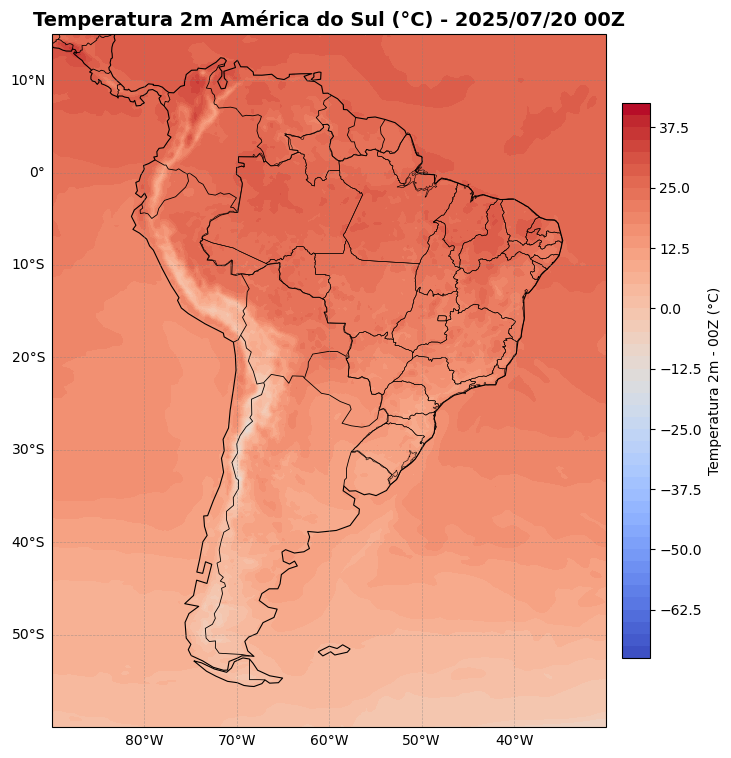

In [ ]:
# Abrindo o arquivo NetCDF
ds = xr.open_dataset("era5_temp2m_2025-07-20.nc")

# Selecionando variável de temperatura
temp = ds['t2m']

# Selecionando apenas o horário 00 UTC
temp_c = temp.isel(valid_time=0) - 273.15  # converter para °C

# Criando figura e projeção
fig, ax = plt.subplots(figsize=(10, 9), subplot_kw={'projection': ccrs.PlateCarree()})

# Pegando coordenadas
lon = temp_c.longitude.values
lat = temp_c.latitude.values
data = temp_c.values

# Plot suave com contourf
img = ax.contourf(
    lon, lat, data,
    levels=50,
    cmap="coolwarm",   # 🔥 paleta de cores
    transform=ccrs.PlateCarree()
)

# Adicionando shapefiles (costas, países e estados)
ax.add_feature(cfeature.COASTLINE, linewidth=0.8, edgecolor="black")
ax.add_feature(cfeature.BORDERS, linewidth=0.6, edgecolor="black")
ax.add_feature(
    cfeature.STATES.with_scale('50m'),
    linewidth=0.4,
    edgecolor="black",
    facecolor="none"   # só contorno preto
)

# Ajustando extensão para América do Sul
ax.set_extent([-90, -30, -60, 15], crs=ccrs.PlateCarree())

# Adicionando gridlines com coordenadas
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False   # remove labels do topo
gl.right_labels = False # remove labels da direita
#Removi os labels pra ficar com design mais clean e no lugar ficaram o titulo e a cbar (isso é opcional)

# Config Cbar
cbar = plt.colorbar(img, orientation="vertical", pad=0.02, shrink=0.8)
cbar.set_label("Temperatura 2m - 00Z (°C)")

# Título 
tempo = pd.to_datetime(temp_c.valid_time.values).strftime("%Y/%m/%d %HZ")
plt.title(f"Temperatura 2m América do Sul (°C) - {tempo}",
          fontsize=14, fontweight="bold")
plt.savefig("figura_temp2m.png", dpi=600, bbox_inches="tight")
plt.show()


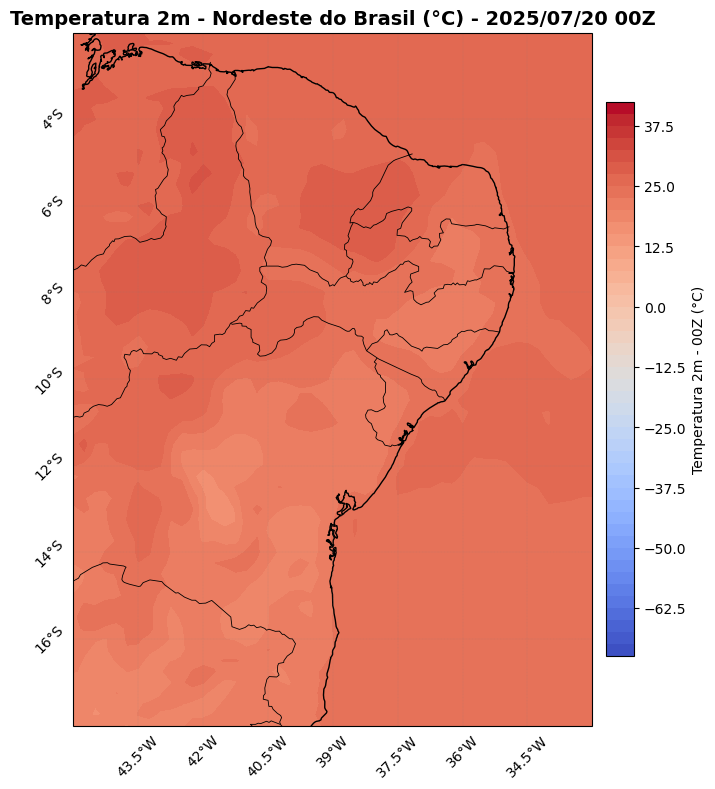

In [ ]:
# Abrindo o arquivo NetCDF
ds = xr.open_dataset("era5_temp2m_2025-07-20.nc")

# Selecionando variável de temperatura
temp = ds['t2m']

# Selecionando apenas o horário 00 UTC e converter para °C
temp_c = temp.isel(valid_time=0) - 273.15  

# Criando figura e projeção
fig, ax = plt.subplots(figsize=(9, 9), subplot_kw={'projection': ccrs.PlateCarree()})

# Pegando coordenadas
lon = temp_c.longitude.values
lat = temp_c.latitude.values
data = temp_c.values

# Plot suave com contourf
img = ax.contourf(
    lon, lat, data,
    levels=50,
    cmap="coolwarm",
    transform=ccrs.PlateCarree()
)

# Shapefile Brasil
shapefile = "ne_10m_admin_0_countries_bra.shp"
gdf = gpd.read_file(shapefile)
gdf.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=1.0)

# Estados
states = cfeature.NaturalEarthFeature(category='cultural', 
                                      name='admin_1_states_provinces_lines',
                                      scale='50m', facecolor='none')
ax.add_feature(states, edgecolor='black', linewidth=0.6)

# Extensão para Nordeste (pode mudar pra o local que vc quiser)
ax.set_extent([-45, -33, -18, -2], crs=ccrs.PlateCarree())

# Gridlines com coordenadas
g1 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.2, color='gray', alpha=0.5, linestyle='--')
g1.top_labels = False
g1.right_labels = False
g1.xlabel_style = {'rotation': 45}
g1.ylabel_style = {'rotation': 45}

# Cbar
cbar = plt.colorbar(img, orientation="vertical", pad=0.02, shrink=0.8)
cbar.set_label("Temperatura 2m - 00Z (°C)")

# Título 
tempo = pd.to_datetime(temp_c.valid_time.values).strftime("%Y/%m/%d %HZ")
plt.title(f"Temperatura 2m - Nordeste do Brasil (°C) - {tempo}",
          fontsize=14, fontweight="bold")
plt.savefig("figura_temp2m_neb.png", dpi=600, bbox_inches="tight")
plt.show()


In [3]:
# Configurar cliente
c = cdsapi.Client()

# Baixar dados de precipitação acumulada
c.retrieve(
    'reanalysis-era5-single-levels',
    {
        'product_type': 'reanalysis',
        'variable': 'total_precipitation',
        'year': '2025',
        'month': '07',
        'day': '20',
        'time': [
            '00:00','01:00','02:00','03:00','04:00','05:00',
            '06:00','07:00','08:00','09:00','10:00','11:00',
            '12:00','13:00','14:00','15:00','16:00','17:00',
            '18:00','19:00','20:00','21:00','22:00','23:00'
        ],
        'format': 'netcdf',
        # Limite geográfico do Nordeste aproximado
        'area': [5, -46, -18, -34],  # [Norte, Oeste, Sul, Leste]
    },
    'era5_precip_ne_2025-07-20.nc'
)


2025-09-01 15:44:38,395 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-09-01 15:44:39,299 INFO Request ID is c86e59c6-955b-46c0-8c70-42365830f5b7
2025-09-01 15:44:39,561 INFO status has been updated to accepted
2025-09-01 15:44:53,980 INFO status has been updated to running
2025-09-01 15:45:01,828 INFO status has been updated to successful


'era5_precip_ne_2025-07-20.nc'

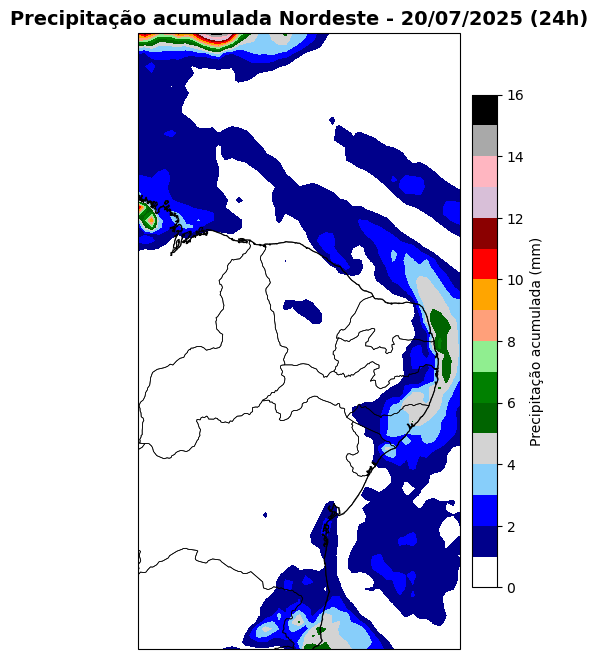

In [ ]:
# Abrindo NetCDF
ds = xr.open_dataset("era5_precip_ne_2025-07-20.nc")


# Selecionando variável de precipitação
prec = ds['tp'] * 1000  # converter de m para mm

# Somando ao longo das 24h (acumulado diário)
prec_day = prec.sum(dim="valid_time")

# Definindo paleta de cores
cores = [
    "white", "darkblue", "blue", "lightskyblue", "lightgray",
    "darkgreen", "green", "lightgreen", "yellow", "lightsalmon",
    "orange", "red", "darkred", "thistle", "lightpink",
    "darkgray", "black"
]
cmap = ListedColormap(cores)

# Criando mapa
fig, ax = plt.subplots(figsize=(8,8), subplot_kw={'projection': ccrs.PlateCarree()})
img = ax.contourf(
    prec_day.longitude, prec_day.latitude, prec_day.values,
    cmap=cmap, levels=len(cores), transform=ccrs.PlateCarree()
)

# Adicionando features 
ax.add_feature(cfeature.COASTLINE, linewidth=0.8)
ax.add_feature(cfeature.BORDERS, linewidth=0.5)
ax.add_feature(cfeature.STATES.with_scale('50m'), linewidth=0.5)

# Ajustando extensão para Nordeste
ax.set_extent([-46, -34, -18, 5], crs=ccrs.PlateCarree())

# Cbar
cbar = plt.colorbar(img, orientation="vertical", pad=0.02, shrink=0.8)
cbar.set_label("Precipitação acumulada (mm)")

# Extrair a data/hora da precipitação
# Extrair a data/hora diretamente do dataset 
# Isso foi pra automatizar o titulo, mas pode escrever manualmente se quiser e excluir a linha abaixo
tempo = pd.to_datetime(ds.valid_time.values[0]).strftime("%d/%m/%Y")

# Título automático
plt.title(f"Precipitação acumulada Nordeste - {tempo} (24h)",
          fontsize=14, fontweight="bold")


plt.savefig("figura_prec_total_neb.png", dpi=600, bbox_inches="tight")
plt.show()
